In [36]:
data_class = data_transformation.data_transformation(path_data = "/data/data_curated_20180219/curated_training_data_no_mass_spec.csv",
                                                     path_mhc = "/data/aligned_mhc_dataset.csv",
                                                     allele_name = None,
                                                     quant_data = True,
                                                     encoding = "one-hot",
                                                     dbscan = False)

pep, mhc, target = data_class.__getitem__()

pep = np.expand_dims(pep, axis=1)
mhc = np.expand_dims(mhc, axis=1)
inp = np.hstack((pep, mhc))
print(inp.shape)

X_train, X_test, y_train, y_test = train_test_split(inp, target.T, test_size=0.2, random_state=42)

(156996, 2, 34, 20)


## Train and Test set have same distribution of the target values

(array([2.2000e+01, 5.6100e+02, 4.8570e+04, 1.9681e+04, 1.7273e+04,
        1.3543e+04, 7.4100e+03, 2.5370e+03, 2.9500e+02, 9.0000e+00]),
 array([-1.43017093, -1.21535945, -1.00054797, -0.7857365 , -0.57092502,
        -0.35611354, -0.14130206,  0.07350942,  0.2883209 ,  0.50313238,
         0.71794386]),
 <a list of 10 Patch objects>)

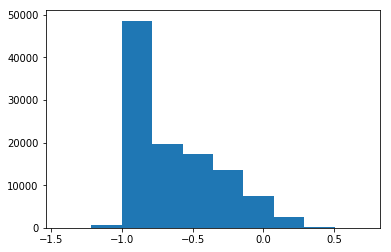

In [3]:
plt.hist(y_train.flatten())

(array([2.1000e+01, 1.5730e+03, 1.2146e+04, 4.8900e+03, 3.8830e+03,
        2.9350e+03, 1.6540e+03, 3.5800e+02, 1.3000e+01, 3.0000e+00]),
 array([-1.34103584, -1.13275871, -0.92448158, -0.71620445, -0.50792732,
        -0.29965019, -0.09137306,  0.11690408,  0.32518121,  0.53345834,
         0.74173547]),
 <a list of 10 Patch objects>)

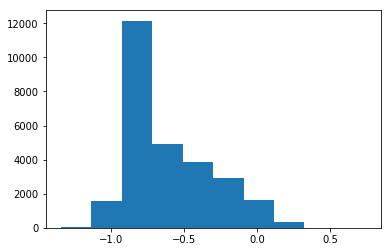

In [4]:
plt.hist(y_test.flatten())

(array([3.6000e+01, 3.4400e+03, 1.1075e+04, 1.6142e+04, 1.7125e+04,
        4.8132e+04, 1.3387e+04, 5.1300e+02, 4.3000e+01, 8.0000e+00]),
 array([-5.74179391, -2.60975186,  0.5222902 ,  3.65433226,  6.78637432,
         9.91841638, 13.05045843, 16.18250049, 19.31454255, 22.44658461,
        25.57862666]),
 <a list of 10 Patch objects>)

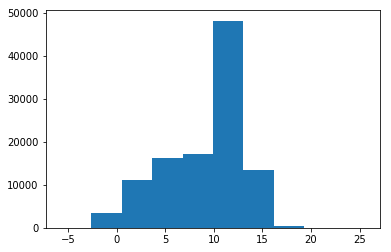

In [28]:
import import_ipynb
import rank_model
from scipy.stats import boxcox

plt.hist(boxcox(rank_model.reverse_log_transformation(y_train).flatten(), 0.05))

(array([5.3000e+01, 4.2350e+03, 1.1962e+04, 1.6714e+04, 1.6842e+04,
        4.7856e+04, 1.1780e+04, 4.1900e+02, 3.4000e+01, 6.0000e+00]),
 array([-3.45442436, -2.72698481, -1.99954526, -1.27210571, -0.54466616,
         0.18277338,  0.91021293,  1.63765248,  2.36509203,  3.09253157,
         3.81997112]),
 <a list of 10 Patch objects>)

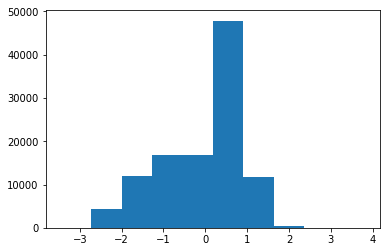

In [69]:
from sklearn.preprocessing import StandardScaler
data = boxcox(rank_model.reverse_log_transformation(y_train), 0.055)#(y_train)
scaler = StandardScaler()
scaler.fit(data)
scaled = scaler.transform(data)
plt.hist(scaled)

(array([1.09882e+05, 9.00000e+00, 5.00000e+00, 2.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1.150000e-03, 1.427660e+06, 2.855320e+06, 4.282980e+06,
        5.710640e+06, 7.138300e+06, 8.565960e+06, 9.993620e+06,
        1.142128e+07, 1.284894e+07, 1.427660e+07]),
 <a list of 10 Patch objects>)

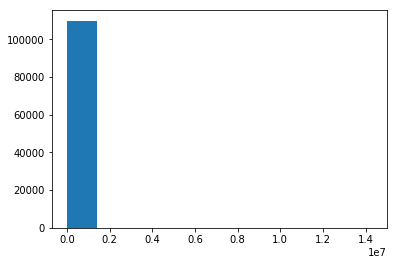

In [40]:
# for inverse transformation
from scipy.special import inv_boxcox
inversed = scaler.inverse_transform(scaled)
plt.hist(inv_boxcox(inversed, 0.055))

(array([1.09882e+05, 9.00000e+00, 5.00000e+00, 2.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1.150000e-03, 1.427660e+06, 2.855320e+06, 4.282980e+06,
        5.710640e+06, 7.138300e+06, 8.565960e+06, 9.993620e+06,
        1.142128e+07, 1.284894e+07, 1.427660e+07]),
 <a list of 10 Patch objects>)

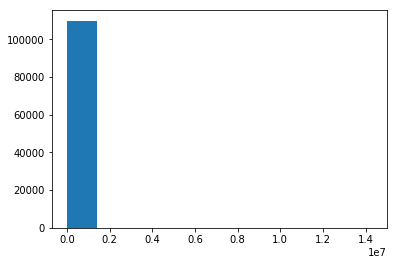

In [41]:
plt.hist(rank_model.reverse_log_transformation(y_train).flatten())

## Naive Model taking only the mean value lead to RMSE of 0.3

In [7]:
pred = np.full(len(y_test.flatten()), np.mean(y_test.flatten()))

In [8]:
error = pred - y_test.flatten()
error2 = np.square(error)
rmse = np.sqrt(np.mean(error2))
rmse

0.29135417313735734

## Comparision of input values of test and train set

In [37]:
results_max = []
for j in range(10000):#tqdm(range(10000)):#len(X_train))):
    a = X_train[j, 0][~np.all(X_train[j, 0] == 0, axis=1)]
    mhc_a = X_train[j, 1][~np.all(X_train[j, 1] == 0, axis=1)]
    results = []
    for i in range(len(X_test)):
        b = X_test[i, 0][~np.all(X_test[i, 0] == 0, axis=1)]
        mhc_b = X_test[i, 1][~np.all(X_test[i, 1] == 0, axis=1)]
        #print(b.size)
        if mhc_a.size == mhc_b.size: #here for now easier looping
            if a.size > b.size:
                temp_b = np.zeros(a.shape)
                temp_b[:b.shape[0],:b.shape[1]] = b
                temp = np.sum(np.all(a == temp_b, axis=1))
            elif a.size < b.size:
                temp_a = np.zeros(b.shape)
                temp_a[:a.shape[0],:a.shape[1]] = a
                temp = np.sum(np.all(temp_a == b, axis=1))
            else:
                temp = np.sum(np.all(a == b, axis=1))
            temp_mhc = np.sum(np.all(mhc_a == mhc_b, axis=1))
            if a.shape[1] >= b.shape[1]:
                results.append([temp / a.shape[0], temp_mhc / mhc_a.shape[0]])
            else:
                results.append([temp / b.shape[0], temp_mhc / mhc_a.shape[0]])
    #print(results)
    if j % 1000 == 0:
        print(j)
    results_max.append(max(np.mean(results, axis = 1)))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


(array([3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        1., 0., 1.]),
 array([0.7       , 0.71352941, 0.72705882, 0.74058824, 0.75411765,
        0.76764706, 0.78117647, 0.79470588, 0.80823529, 0.82176471,
        0.83529412, 0.84882353, 0.86235294, 0.87588235, 0.88941176,
        0.90294118, 0.91647059, 0.93      , 0.94352941, 0.95705882,
        0.97058824]),
 <a list of 20 Patch objects>)

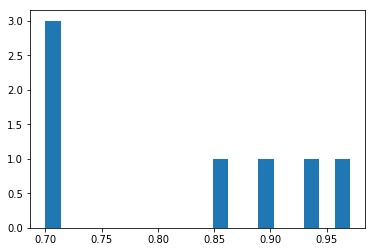

In [13]:
plt.hist(results_max, bins = 20)

In [23]:
np.mean(results_max)

0.8403069815805109

In [38]:
np.save("naive_split.npy", results_max)

## Order Pandas by levensthein distance

In [12]:
cwd = os.getcwd()
os.chdir('..')
os.chdir('..')
os.chdir('..')
current_path = os.getcwd()
dfcl = pd.read_csv(current_path + "/data/data_curated_20180219/curated_training_data_no_mass_spec.csv")
os.chdir(cwd) 
df = dfcl[dfcl.measurement_type == "quantitative"].loc[:, ['peptide', 'allele']].drop_duplicates().reset_index(drop = True)

In [3]:
df.head()

,peptide,allele
0,AENDTLVVSV,BoLA-1*21:01
1,NQFNGGCLLV,BoLA-1*21:01
2,AAHCIHAEW,BoLA-2*08:01
3,AAKHMSNTY,BoLA-2*08:01
4,DSYAYMRNGW,BoLA-2*08:01


In [ ]:
def lev_metric(x, y):
    i, j = int(x[0]), int(y[0])     # extract indices
    return levenshtein(t[i], t[j])

grouping = df.groupby('allele')
list_values = []

for name, group in tqdm(grouping):
    df_test = df[df.allele == name].reset_index(drop = True)
    t = df_test.peptide.values
    X = np.arange(len(t)).reshape(-1, 1)
    #start = time.time()
    te = dbscan(X, metric=lev_metric, eps=4, min_samples=2, algorithm='brute')
    #end = time.time()
    #print(end - start)

    d = {'name_allele': np.repeat(name,te[1].shape[0]), 'name_peptide': t, 'dbscan_cluster': te[1]}
    list_values.append(d)
    
df_cluster = pd.concat([pd.DataFrame(l) for l in list_values],axis=0)

In [10]:
df_cluster.shape

(158963, 3)

In [8]:
df_cluster[df_cluster.dbscan_cluster == -1].shape

(58543, 3)

In [18]:
merge_df = pd.merge(dfcl, df_cluster, left_on = ["allele", "peptide"], right_on = ["name_allele", 'name_peptide'], how='left').drop(['name_peptide', 'name_allele'], axis = 1)

In [19]:
merge_df.to_csv("C:/Users/paul_/OneDrive/Desktop/master-thesis/data/data_curated_20180219/curated_training_data_no_mass_spec_dbscan.csv")

## Test DBSCAN split

In [4]:
data_class = data_transformation.data_transformation(path_data = "/data/data_curated_20180219/curated_training_data_no_mass_spec_dbscan.csv",
                                                     path_mhc = "/data/aligned_mhc_dataset.csv",
                                                     allele_name = None,
                                                     quant_data = True,
                                                     encoding = "one-hot")

pep, mhc, target, dbscan = data_class.__getitem__()

pep = np.expand_dims(pep, axis=1)
mhc = np.expand_dims(mhc, axis=1)
inp = np.hstack((pep, mhc))
print(inp.shape)

np.random.seed(17) #17=0.695, 34=0.694, 100017=0.696
test_index = np.random.choice(np.where(dbscan.T == -1)[0],
                              size = int(np.round(dbscan.T.shape[0] * 0.1)),
                              replace = False)

X_train = inp[~np.isin(np.arange(len(inp)), test_index)]
X_test = inp[np.isin(np.arange(len(inp)), test_index)]
y_train = target.T[~np.isin(np.arange(len(target.T)), test_index)]
y_test = target.T[np.isin(np.arange(len(target.T)), test_index)]

(156996, 2, 34, 20)


In [5]:
np.save("train_target_dist.npy", y_train)
np.save("test_target_dist.npy", y_test)

In [35]:
len(np.where(dbscan.T == -1)[0])

57798

In [39]:
X_train.shape

(125597, 2, 34, 20)

In [40]:
X_test.shape

(31399, 2, 34, 20)

In [41]:
y_train.shape

(125597, 1)

In [42]:
y_test.shape

(31399, 1)

(-1.5, 0.75)

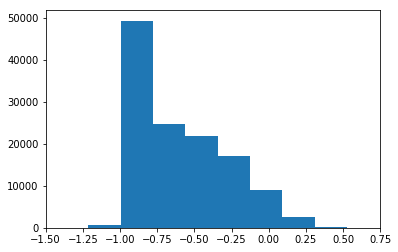

In [43]:
plt.hist(y_train.flatten())
plt.xlim(-1.5, 0.75)

(-1.5, 0.75)

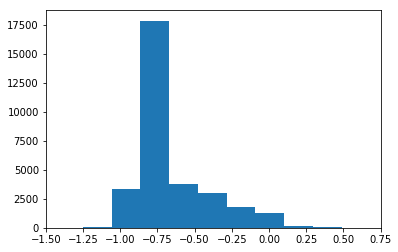

In [44]:
plt.hist(y_test.flatten())
plt.xlim(-1.5, 0.75)

In [151]:
results_max = []
for j in range(10000):#len(X_train))):
    a = X_train[j, 0][~np.all(X_train[j, 0] == 0, axis=1)]
    mhc_a = X_train[j, 1][~np.all(X_train[j, 1] == 0, axis=1)]
    results = []
    for i in range(len(X_test)):
        b = X_test[i, 0][~np.all(X_test[i, 0] == 0, axis=1)]
        mhc_b = X_test[i, 1][~np.all(X_test[i, 1] == 0, axis=1)]
        #print(b.size)
        if mhc_a.size == mhc_b.size: #here for now easier looping
            if a.size > b.size:
                temp_b = np.zeros(a.shape)
                temp_b[:b.shape[0],:b.shape[1]] = b
                temp = np.sum(np.all(a == temp_b, axis=1))
            elif a.size < b.size:
                temp_a = np.zeros(b.shape)
                temp_a[:a.shape[0],:a.shape[1]] = a
                temp = np.sum(np.all(temp_a == b, axis=1))
            else:
                temp = np.sum(np.all(a == b, axis=1))
            temp_mhc = np.sum(np.all(mhc_a == mhc_b, axis=1))
            if a.shape[1] >= b.shape[1]:
                results.append([temp / a.shape[0], temp_mhc / mhc_a.shape[0]])
            else:
                results.append([temp / b.shape[0], temp_mhc / mhc_a.shape[0]])
    #print(results)
    if j % 1000 == 0:
        print(j)
    results_max.append(max(np.mean(results, axis = 1)))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


(array([  1.,   1.,   0.,   5.,   1.,   5.,  12.,  31., 149.,  60., 203.,
         14.,  13.,   2.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([0.45      , 0.47676471, 0.50352941, 0.53029412, 0.55705882,
        0.58382353, 0.61058824, 0.63735294, 0.66411765, 0.69088235,
        0.71764706, 0.74441176, 0.77117647, 0.79794118, 0.82470588,
        0.85147059, 0.87823529, 0.905     , 0.93176471, 0.95852941,
        0.98529412]),
 <a list of 20 Patch objects>)

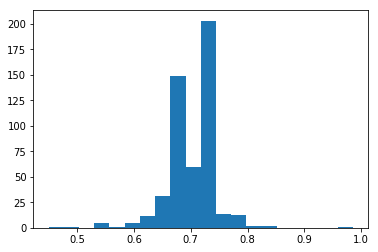

In [46]:
plt.hist(results_max, bins = 20)

In [47]:
np.mean(results_max)

0.6954677361853832

In [152]:
np.save("dbscan_split.npy", results_max)

## Generate evaluation testset

In [15]:
def normalize(s, disallowed=["MIC", "HFE"]):
    if any(item in s for item in disallowed):
        return None
    try:
        return mhcnames.normalize_allele_name(s)
    except:
        while s:
            s = ":".join(s.split(":")[:-1])
            try:
                return mhcnames.normalize_allele_name(s)
            except:
                pass
        return None

In [16]:
training = pd.read_csv("C:/Users/paul_/OneDrive/Desktop/master-thesis/data/data_curated_20180219/curated_training_data_no_mass_spec_dbscan.csv")
test = pd.read_csv("C:/Users/paul_/OneDrive/Desktop/master-thesis/data/test_data_all_allele.csv")
new_test = pd.read_csv("C:/Users/paul_/OneDrive/Desktop/master-thesis/data/all_possible_testdata.csv")

In [17]:
training.head()

,Unnamed: 0,allele,peptide,measurement_value,measurement_inequality,measurement_type,measurement_source,original_allele,dbscan_cluster
0,0,BoLA-1*21:01,AENDTLVVSV,7817.0,=,quantitative,Barlow - purified MHC/competitive/fluorescence,BoLA-1*02101,-1.0
1,1,BoLA-1*21:01,NQFNGGCLLV,1086.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-1*02101,-1.0
2,2,BoLA-2*08:01,AAHCIHAEW,21.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-2*00801,0.0
3,3,BoLA-2*08:01,AAKHMSNTY,1299.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-2*00801,1.0
4,4,BoLA-2*08:01,DSYAYMRNGW,2.0,=,quantitative,Barlow - purified MHC/direct/fluorescence,BoLA-2*00801,-1.0


In [18]:
test = test.loc[:, ["allele", "peptide", "measurement_value", "original_allele", "measurement_type", "measurement_source"]]
test.head()

,allele,peptide,measurement_value,original_allele,measurement_type,measurement_source
0,H-2-Db,AAIRGNDVI,10.75050,H2-Db,quantitative,Tscharke - purified MHC/competitive/radioactivity
1,H-2-Db,ALPTNEFISFL,79.21390,H2-Db,quantitative,Tscharke - purified MHC/competitive/radioactivity
2,H-2-Db,APGSPTNLEFI,14.03950,H2-Db,quantitative,Tscharke - purified MHC/competitive/radioactivity
3,H-2-Db,ASLKNFKEL,6.72472,H2-Db,quantitative,Tscharke - purified MHC/competitive/radioactivity
4,H-2-Db,DIKNLLTACTI,27.15940,H2-Db,quantitative,Tscharke - purified MHC/competitive/radioactivity


In [19]:
new_test['allele'] = new_test['original_allele'].apply(normalize)

In [20]:
new_test
new_test = pd.merge(new_test, training,
                          right_on = ['allele', "peptide"],
                          left_on = ['allele', "peptide"],
                          how = 'left',
                          suffixes=('', '_y'),)
new_test = new_test[pd.isnull(new_test['original_allele_y'])].reset_index(drop = True)
new_test = new_test.loc[:, ["allele", "peptide", "measurement_value", "original_allele", "measurement_type", "measurement_source"]]

In [21]:
print(len(new_test))
new_test.head()

2115


,allele,peptide,measurement_value,original_allele,measurement_type,measurement_source
0,H-2-Db,AAIRGNDVI,10.8,H2-Db,quantitative,NaN
1,Mamu-A*01:11,AANLWVTVY,18800.0,Mamu-A1*011:01,quantitative,NaN
2,HLA-B*07:02,ACDGERPTL,28719.0,HLA-B*07:02,quantitative,NaN
3,HLA-A*02:01,ACDPHSGHFV,1813.0,HLA-A*02:01,quantitative,NaN
4,Mamu-A*01:11,ADASTPESANL,19800.0,Mamu-A1*011:01,quantitative,NaN


In [22]:
new_testset = test.append(new_test).drop_duplicates().reset_index(drop = True)

In [31]:
print(len(new_testset))
new_testset.head()

2421


,allele,peptide,measurement_value,original_allele,measurement_type,measurement_source
0,H-2-Db,AAIRGNDVI,10.75050,H2-Db,quantitative,Tscharke - purified MHC/competitive/radioactivity
1,H-2-Db,ALPTNEFISFL,79.21390,H2-Db,quantitative,Tscharke - purified MHC/competitive/radioactivity
2,H-2-Db,APGSPTNLEFI,14.03950,H2-Db,quantitative,Tscharke - purified MHC/competitive/radioactivity
3,H-2-Db,ASLKNFKEL,6.72472,H2-Db,quantitative,Tscharke - purified MHC/competitive/radioactivity
4,H-2-Db,DIKNLLTACTI,27.15940,H2-Db,quantitative,Tscharke - purified MHC/competitive/radioactivity


In [32]:
new_testset = new_testset[new_testset.measurement_value > 0].reset_index(drop = True)

In [33]:
new_testset.to_csv("C:/Users/paul_/OneDrive/Desktop/master-thesis/data/new_model_testset.csv")

In [6]:
data_class = data_transformation.data_transformation(path_data = "/data/data_curated_20180219/curated_training_data_no_mass_spec_dbscan.csv",
                                                     path_mhc = "/data/aligned_mhc_dataset.csv",
                                                     allele_name = None,
                                                     quant_data = True,
                                                     encoding = "one-hot")
data_class.filter_data().loc[:, ['normalized_allele']].drop_duplicates()

In [39]:
data_class = data_transformation.data_transformation(path_data = "/data/new_model_testset.csv",
                                                     path_mhc = "/data/aligned_mhc_dataset.csv",
                                                     allele_name = None,
                                                     quant_data = True,
                                                     dbscan = False,
                                                     encoding = "one-hot")
print(len(data_class.filter_data().loc[:, ['normalized_allele']].drop_duplicates()))
data_class.filter_data()

35


,Unnamed: 0_x,allele,peptide,measurement_type,normalized_allele,mhc_sequence,Unnamed: 0_y,measurement_value_y
0,0,H-2-Db,AAIRGNDVI,quantitative,H-2-Db,YESYYREKAGQWFVSNLYLQSLFYTWSAYAYEWY,153.5,-0.127290
1,307,H-2-Db,AAIRGNDVI,quantitative,H-2-Db,YESYYREKAGQWFVSNLYLQSLFYTWSAYAYEWY,153.5,-0.127290
2,1,H-2-Db,ALPTNEFISFL,quantitative,H-2-Db,YESYYREKAGQWFVSNLYLQSLFYTWSAYAYEWY,200.0,-0.311657
3,399,H-2-Db,ALPTNEFISFL,quantitative,H-2-Db,YESYYREKAGQWFVSNLYLQSLFYTWSAYAYEWY,200.0,-0.311657
4,2,H-2-Db,APGSPTNLEFI,quantitative,H-2-Db,YESYYREKAGQWFVSNLYLQSLFYTWSAYAYEWY,205.0,-0.151617
5,408,H-2-Db,APGSPTNLEFI,quantitative,H-2-Db,YESYYREKAGQWFVSNLYLQSLFYTWSAYAYEWY,205.0,-0.151617
6,3,H-2-Db,ASLKNFKEL,quantitative,H-2-Db,YESYYREKAGQWFVSNLYLQSLFYTWSAYAYEWY,212.0,-0.083546
7,421,H-2-Db,ASLKNFKEL,quantitative,H-2-Db,YESYYREKAGQWFVSNLYLQSLFYTWSAYAYEWY,212.0,-0.083546
8,4,H-2-Db,DIKNLLTACTI,quantitative,H-2-Db,YESYYREKAGQWFVSNLYLQSLFYTWSAYAYEWY,265.0,-0.212802
9,526,H-2-Db,DIKNLLTACTI,quantitative,H-2-Db,YESYYREKAGQWFVSNLYLQSLFYTWSAYAYEWY,265.0,-0.212802
